# Biodiversity in U.S. National Parks

Importing the necessary modules

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading in the data

There are two .csv files to inspect

----

## Observations

The `observations.csv` contains data about different species and their conservation status

- `scientific_name` - the scientific name of each species
- `park_name` - National Park where species were found
- `observations` - the number of times each species was observed at park in the past 7 days


In [179]:
obs_data = pd.read_csv("observations.csv")
print(f"Columns: {obs_data.columns.tolist()}\n")

Columns: ['scientific_name', 'park_name', 'observations']



In [180]:
print(f"The first few entries in the Dataframe:\n\n{obs_data.head()}\n")
print(f"(Rows, Columns): {obs_data.shape}\n")
print(f"Data types: \n{obs_data.dtypes}")

The first few entries in the Dataframe:

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

(Rows, Columns): (23296, 3)

Data types: 
scientific_name    object
park_name          object
observations        int64
dtype: object


In [201]:
parks_list = obs_data.park_name.unique().tolist()
print(f"National Parks: \n{parks_list}\n")

sci_name = obs_data.scientific_name.unique()
print(f"Unique Species: \n{sci_name}\n")
sci_name_list_1 = sci_name.tolist()

print(f"We have {len(sci_name_list_1)} unique species")

National Parks: 
['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

Unique Species: 
['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

We have 5541 unique species


In [182]:
print(f"The number of unique values: \n{obs_data.nunique()}\n")

The number of unique values: 
scientific_name    5541
park_name             4
observations        304
dtype: int64



We have saved the list variables;

`parks_list`
which is a list of the National parks.
There are four, all in the United States

`num_species_list`
which is a list of unique species.

In [183]:
print(f"Number of observations: {obs_data.observations.sum()}")

Number of observations: 3314739


That's quite a few sightings in the last seven days!

----

## Species

The `species_info.csv` contains information on the different species in the National Parks along with their conservation status.

`category` - class of animal
`scientific_name` - the scientific name of each species
`common_name` - the common names of each species
`conservation_status` - each species’ current conservation status


In [184]:
species_data = pd.read_csv("species_info.csv")
print(f"Columns: {species_data.columns.tolist()}")

Columns: ['category', 'scientific_name', 'common_names', 'conservation_status']


In [185]:
print(species_data.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


We have a few interesting values.
Category seems to be genus.
we have scientific name -
#### need to see if the number of unique values correlates with the other dataframe
common names - there seem to be a number
conservation status -
#### need how many we have 'NaN' which i'm assuming means 'not endangered' - (could be bad assumption)

In [186]:
print(f"Shape of the data (Rows, Columns): {species_data.shape}\n")
print(f"Type of data:\n\n{species_data.dtypes}\n")
print(f"The number of unique values:\n\n{species_data.nunique()}")

Shape of the data (Rows, Columns): (5824, 4)

Type of data:

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

The number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


It's useful to have a few of the unique column values saved as lists to better see what we're dealing with

In [187]:
sci_name_list_2 = species_data.scientific_name.unique()
print(f"Unique Species (Scientific Name): {len(sci_name_list_2)}\n")

com_name_list = species_data.common_names.unique()
print(f"Unique Species (Common Name): {len(com_name_list)}")

Unique Species (Scientific Name): 5541

Unique Species (Common Name): 5504


I would expect the scientific name/common name to be the same length. There's a discrepancy
Maybe some species haven't been given a 'common name'!

## Explore the `species_info` data

#### Category

Find the number of `category` that are represented in the data.

In [188]:
category_list = species_data.category.unique()
print(f"{len(category_list)} Categories:\n{category_list}\n")
species_data.groupby('category').size()

7 Categories:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']



category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### Conservation Status

Explore the `conservation_status` column

In [189]:
print(f"There are {species_data.conservation_status.nunique()} categories:\n\n{species_data.conservation_status.unique()}")

There are 4 categories:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Useful to find out how many are NaN

In [190]:
print(f"NaN value count: {species_data.conservation_status.isna().sum()}\n")
print(species_data.groupby("conservation_status").size())

NaN value count: 5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


----

# Analysis



The column `conservation_status` has values;
&nbsp;
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
&nbsp;
I will change the `NaN` value to 'Least Concern' as per the [International Union for Conservation of Nature](https://en.wikipedia.org/wiki/IUCN_Red_List) classification system

In [191]:
species_data.fillna('Least Concern', inplace=True)
species_data.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

In [192]:
conservation_cat = species_data[species_data.conservation_status != 'Least Concern']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
print(f"Categories nested in conservation_status' column:\n\n{conservation_cat}")

Categories nested in conservation_status' column:

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Birds have the greatest number of 'Species of Concern'

In [193]:
cons_status_list_temp = species_data.conservation_status.unique().tolist()
cons_status_list = cons_status_list_temp[1:]

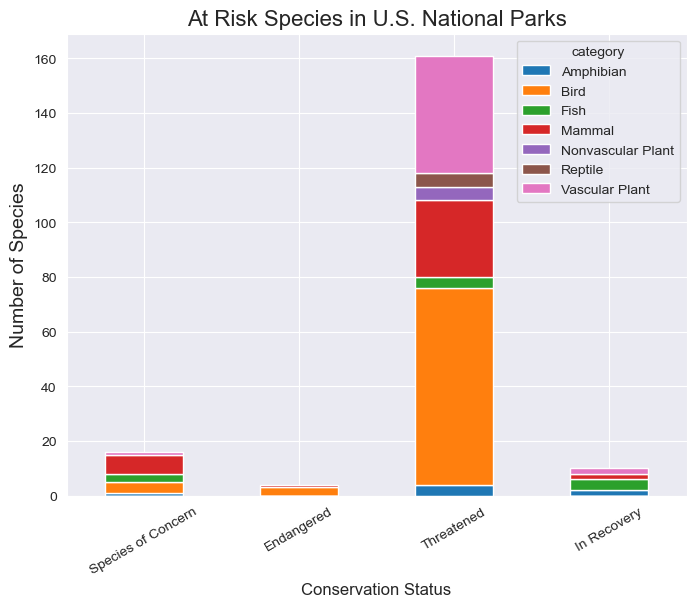

<Figure size 640x480 with 0 Axes>

In [194]:
ax = conservation_cat.plot(kind='bar', figsize=(8,6),
                           stacked=True)
ax.set_xlabel("Conservation Status", fontsize=12)
ax.set_ylabel("Number of Species", fontsize=14)
ax.set_xticks(range(len(cons_status_list)))
ax.set_xticklabels(cons_status_list)
plt.xticks(rotation=30, fontsize=10)
plt.title("At Risk Species in U.S. National Parks", fontsize=16)
plt.show()
plt.clf()

### I will plot another visualisation removing the 'Threatened' category

In [195]:
conservation_cat_two = species_data[(species_data.conservation_status != 'Least Concern')
                    & (species_data.conservation_status != 'Threatened')]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

In [196]:
cons_status_list.remove('Threatened')

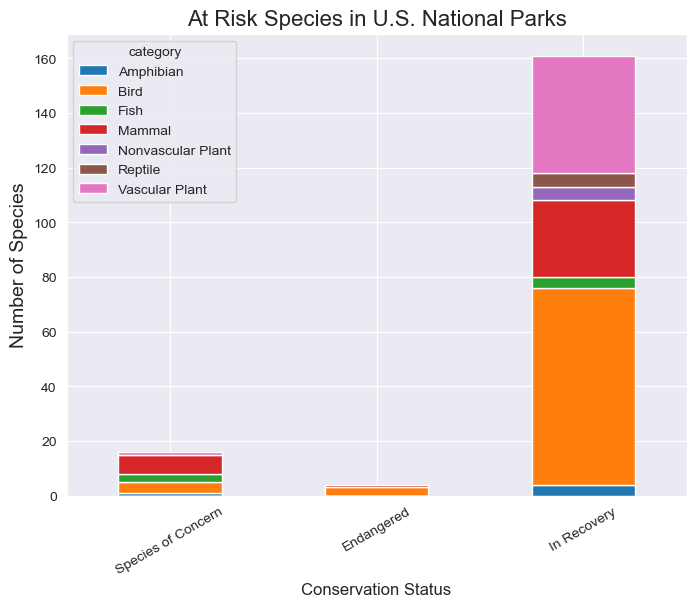

<Figure size 640x480 with 0 Axes>

In [197]:
ax = conservation_cat_two.plot(kind='bar', figsize=(8,6),
                           stacked=True)
ax.set_xlabel("Conservation Status", fontsize=12)
ax.set_ylabel("Number of Species", fontsize=14)
ax.set_xticks(range(len(cons_status_list)))
ax.set_xticklabels(cons_status_list)
plt.xticks(rotation=30, fontsize=10)
plt.title("At Risk Species in U.S. National Parks", fontsize=16)
plt.show()
plt.clf()

It's clear 'Birds' are most at risk across the board in U.S. National Parks.
&nbsp;
- A lot of this visualisation can be cleared up.
Especially with the list indexing code. Some is quite inefficient

### So are certain types of species more likely to be endangered?

I will create a new column, `is_protected` to include any species with a value other than `Least Concern`.

In [198]:
species_data['is_protected'] = species_data.conservation_status != 'Least Concern'

In [199]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                            .scientific_name.nunique()\
                            .reset_index()\
                            .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                            .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Will at a column `percent_protected` that shows the rate of protection

In [106]:
percentage = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 2)

category_counts['percent_protected'] = percentage
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


----

# Species Exploration

### Wolves

I fill first explore the genus [Canis](https://en.wikipedia.org/wiki/Canis) which includes;
wolves, dogs, coyotes and jackals.

In [108]:
species_data['is_canis'] = species_data.scientific_name.str.contains(r"\bCanis\b", regex=True)
species_data[species_data.is_canis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis
7,Mammal,Canis latrans,Coyote,Species of Concern,True,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True


They are all protected.

However, there are not many species represented.
Could be an element of disambuiguity with the common name taking different values
`Gray Wolf` is represented three times with different conservation status...

Data cleaning needs to happen before exploring another Genus

----

### Big Cats

I will first explore any hits under `common_name` 'cat' or 'lion'

In [117]:
species_data['cat'] = species_data.common_names.str.contains(r"\bCat\b", regex=True)
species_data[species_data.cat]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,big_cat,lion,cat
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True,False,True
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Least Concern,False,False,True,False,True
3577,Vascular Plant,Cryptantha torreyana,"Torrey's Cat's-Eye, Torrey's Cryptantha",Least Concern,False,False,True,False,True
4062,Vascular Plant,Picea glauca,"Black Hills Spruce, Canadian Spruce, Cat Spruc...",Least Concern,False,False,True,False,True
4798,Vascular Plant,Hypochaeris glabra,"Smooth Cat's Ear, Smooth Catsear",Least Concern,False,False,True,False,True
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern,False,False,True,False,True


Hit one cat and five plants...

In [118]:
species_data['lion'] = species_data.common_names.str.contains(r"\bLion\b", regex=True)
species_data[species_data.lion]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,big_cat,lion,cat
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True,False
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,False,False,True,False
897,Vascular Plant,Prenanthes serpentaria,"Lion's-Foot, Rattlesnakeroot",Least Concern,False,False,False,True,False
898,Vascular Plant,Prenanthes trifoliolata,"Lion's Foot, Three-Leaved Rattlesnake-Root",Least Concern,False,False,False,True,False
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,False,False,True,False
4451,Mammal,Puma concolor,Mountain Lion,Least Concern,False,False,False,True,False


More disambuiguity with `lion`
Puma concolor has been refered at as "Panther, Cougar, Mountain Lion, Puma"
Felis concolor has also been refered to as a "Mountain Lion"

Let's see if there are any more hits for the genus [Felis](https://en.wikipedia.org/wiki/Felis)

In [119]:
species_data['is_felis'] = species_data.scientific_name.str.contains(r"\bFelis\b", regex=True)
species_data[species_data.is_felis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,big_cat,lion,cat,is_felis
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True,False,True
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True,False,True,True


----
#### Milestone

The disambuiguity suggests members of the public are potentially 'self-reporting' observations and maybe they do not know what they have seen at all! - This is an assumption

Will remove the newly created columns to 'clean' `species_data`

In [120]:
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,big_cat,lion,cat,is_felis
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False,False,False,False,False


In [127]:
species_data.drop(columns=['is_canis', 'big_cat', 'lion', 'cat', 'is_felis'], axis=1, inplace=True)
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False


----

## Birds of Prey

In [131]:
protected_birds = (species_data[(species_data.category == 'Bird')\
                                & (species_data.conservation_status != 'Least Concern')])
print(protected_birds.head())
print(f"\nThere are {len(protected_birds)} protected bird species in the Dataframe")

   category     scientific_name         common_names conservation_status  \
91     Bird  Accipiter cooperii        Cooper's Hawk  Species of Concern   
93     Bird  Accipiter striatus   Sharp-Shinned Hawk  Species of Concern   
94     Bird   Aquila chrysaetos         Golden Eagle  Species of Concern   
96     Bird      Buteo lineatus  Red-Shouldered Hawk  Species of Concern   
98     Bird      Circus cyaneus     Northern Harrier  Species of Concern   

    is_protected  
91          True  
93          True  
94          True  
96          True  
98          True  

There are 79 protected bird species in the Dataframe


I want to isolate birds of prey.

Need to do research and create a list of the common names of American birds of prey.
For example, [Eagle, Hawk, etc...](https://en.wikipedia.org/wiki/Bird_of_prey)

There is a chance I may miss entries with this method

In [143]:
birds_of_prey = ["Eagle", "Hawk", "Falcon", "Buzzard", "Harrier", "Kite", "Owl", "Osprey", "Vulture", "Condor"]

In [152]:
species_data['bird_of_prey'] = species_data.common_names.str.findall('(?i)({0})'.format('|'.join(birds_of_prey)))
protected_birds = (species_data[(species_data.category == 'Bird')\
                                & (species_data.conservation_status != 'Least Concern')])
print(protected_birds.head())
print(protected_birds.shape)

   category     scientific_name         common_names conservation_status  \
91     Bird  Accipiter cooperii        Cooper's Hawk  Species of Concern   
93     Bird  Accipiter striatus   Sharp-Shinned Hawk  Species of Concern   
94     Bird   Aquila chrysaetos         Golden Eagle  Species of Concern   
96     Bird      Buteo lineatus  Red-Shouldered Hawk  Species of Concern   
98     Bird      Circus cyaneus     Northern Harrier  Species of Concern   

    is_protected bird_of_prey  
91          True       [Hawk]  
93          True       [Hawk]  
94          True      [Eagle]  
96          True       [Hawk]  
98          True    [Harrier]  
(79, 6)


In [159]:
protected_birds_prey = protected_birds[protected_birds['bird_of_prey'].map(lambda d: len(d)) > 0]
protected_birds_prey_list = protected_birds_prey.common_names.tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")

We have 18 protected birds of prey                

With Common Names:

["Cooper's Hawk", 'Sharp-Shinned Hawk', 'Golden Eagle', 'Red-Shouldered Hawk', 'Northern Harrier', 'American Swallow-Tailed Kite, Swallow-Tailed Kite', 'Bald Eagle', 'Turkey Vulture', 'Osprey', 'Peregrine Falcon', 'Short-Eared Owl', 'Long-Eared Owl', 'Rough-Legged Hawk', 'Osprey, Western Osprey', 'Prairie Falcon', 'American Peregrine Falcon', 'White-Tailed Kite', 'California Condor']


`protected_birds` will be merged with `obs_data` to create a Dataframe `protected_birds_obs` with observations of protected birds across the four national parks

In [167]:
protected_birds_obs = obs_data.merge(protected_birds[protected_birds.is_protected])
print(protected_birds_obs.head())

      scientific_name                            park_name  observations  \
0  Accipiter cooperii                  Bryce National Park            95   
1  Accipiter cooperii               Yosemite National Park           138   
2  Accipiter cooperii            Yellowstone National Park           245   
3  Accipiter cooperii  Great Smoky Mountains National Park            65   
4   Pandion haliaetus               Yosemite National Park           134   

  category   common_names conservation_status  is_protected bird_of_prey  
0     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
1     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
2     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
3     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
4     Bird         Osprey  Species of Concern          True     [Osprey]  


In [173]:
protected_birds_prey_obs = protected_birds_obs[protected_birds_obs['bird_of_prey'].map(lambda d: len(d)) > 0]
print(protected_birds_prey_obs.head())

      scientific_name                            park_name  observations  \
0  Accipiter cooperii                  Bryce National Park            95   
1  Accipiter cooperii               Yosemite National Park           138   
2  Accipiter cooperii            Yellowstone National Park           245   
3  Accipiter cooperii  Great Smoky Mountains National Park            65   
4   Pandion haliaetus               Yosemite National Park           134   

  category   common_names conservation_status  is_protected bird_of_prey  
0     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
1     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
2     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
3     Bird  Cooper's Hawk  Species of Concern          True       [Hawk]  
4     Bird         Osprey  Species of Concern          True     [Osprey]  


In [171]:
bird_obs_by_park = protected_birds_obs.groupby('park_name').observations.sum().reset_index()
print(bird_obs_by_park)

                             park_name  observations
0                  Bryce National Park          7608
1  Great Smoky Mountains National Park          5297
2            Yellowstone National Park         18526
3               Yosemite National Park         11293


In [177]:
bird_prey_obs_by_park = protected_birds_prey_obs.groupby('park_name').observations.sum().reset_index()

percentage_prey_obs = round(bird_prey_obs_by_park.observations / (bird_obs_by_park.observations + bird_prey_obs_by_park.observations) * 100, 2)
bird_prey_obs_by_park['percentage_observations'] = percentage_prey_obs

print(bird_prey_obs_by_park)

                             park_name  observations  percentage_observations
0                  Bryce National Park          1626                    17.61
1  Great Smoky Mountains National Park          1140                    17.71
2            Yellowstone National Park          4244                    18.64
3               Yosemite National Park          2508                    18.17


----

# Need to create some visualisations of species of bird of prey by park sighting